In [50]:
# Additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [51]:
# Import pandas
import pandas as pd

In [4]:
# Create a DataFrame with balance.txt
df = pd.read_csv('balance.txt', sep=' ', header=0)
df.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,23.283334,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,22.530409,104.593,7075,514,4,71,11,Male,No,No,Asian
3,27.652811,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.893978,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian


Write the code needed to produce a report that provides the following information:
* Compare the average income based on ethnicity. 
* On average, do married or single people have a higher balance?
* What is the highest income in our dataset?
* What is the lowest income in our dataset?
* How many cards do we have recorded in our dataset? (Hint: use `sum()`)
* How many females do we have information for vs how many males? (Hint: use `count()`For a list of all methods for computation of descriptive stats, explore the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats)). 




### **1. Compare the average income based on ethnicity**

In [5]:
# Counting the number of values for each class
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [6]:
# Group the data by ethnicity and compute the mean income
df.groupby('Ethnicity')['Income'].mean()

Ethnicity
African American    47.682101
Asian               44.187833
Caucasian           44.521945
Name: Income, dtype: float64

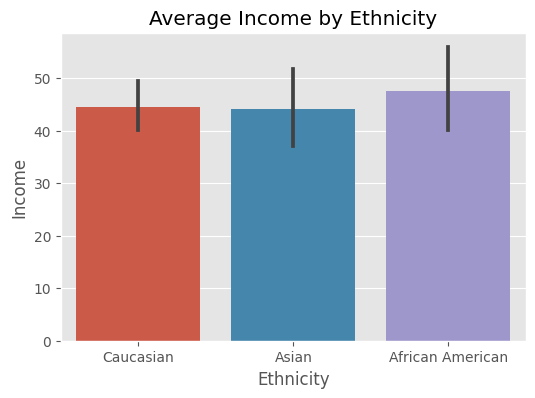

In [7]:
# Creating a barplot with Seaborn
plt.figure(figsize=(6,4))
sns.barplot(x='Ethnicity', y='Income', data=df)

# Set the plot title and axis labels
plt.title('Average Income by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Income')

# Show the plot
plt.show()

* There is a difference in the average income among the different ethnic groups, with African Americans having the highest average income and Asians having the lowest average income.
* The difference in average income between ethnic groups may be attributed to various factors, such as historical and socioeconomic disparities, education levels, and job opportunities.
* Further analysis is required to identify the factors that contribute to the differences in income among ethnic groups, and steps can be taken to address any disparities found.

### **2. On average, do married or single people have a higher balance?**

In [8]:
# Group the data by marital status and compute the mean income
df.groupby('Married')['Income'].mean()

Married
No     43.641090
Yes    46.217082
Name: Income, dtype: float64

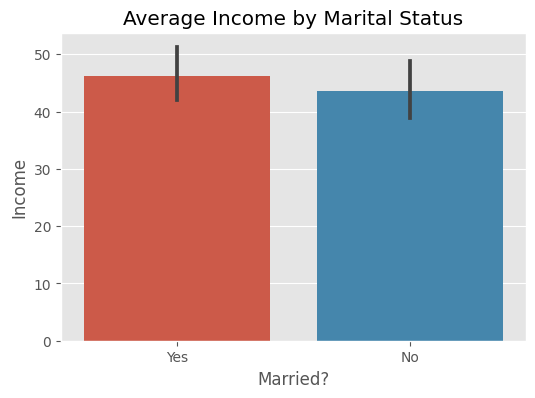

In [9]:
# Creating a barplot with Seaborn
plt.figure(figsize=(6,4))
sns.barplot(x='Married', y='Income', data=df)

# Set the plot title and axis labels
plt.title('Average Income by Marital Status')
plt.xlabel('Married?')
plt.ylabel('Income')

# Show the plot
plt.show()

* On average, people who are married have a slightly higher balance than those who are not married.
* People who are married have a slightly higher income on average than those who are not married.

### **3. What is the highest income in our dataset?**

To analyse income we can start by looking at the histograms to analyse the distribution of income occurrences.

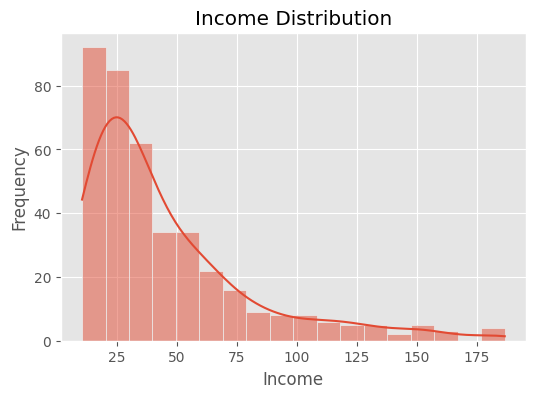

In [10]:
# Create a distribution plot of Income
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Income", kde=True)

# Set plot title and axis labels
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The results suggest that the largest number of individuals have incomes below $25. Similarly, there are a few who exceed the threshold of $175 in income; so the highest value must be above this figure.

In [11]:
highest_income = df['Income'].max() # Highest income
print('The Highest income in the dataframe is: $' + str(highest_income))

The Highest income in the dataframe is: $186.634


The histogram analysis is fulfilled, as the individual with the highest income has $186.634 of income. 

### **4. What is the lowest income in our dataset?**

In [12]:
lowest_income = df['Income'].min() # Highest income
print('The lowest income in the dataframe is: $' + str(lowest_income))

The lowest income in the dataframe is: $10.354


Again, the lowest earner in the dataframe is found to be below $10. This suggests a tremendous gap between the income of the highest and lowest earner. 

### Gap between the highest and lowest incomes 

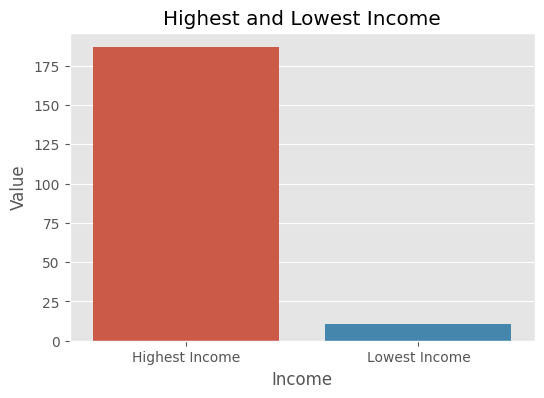

In [13]:
# Create a bar plot using Seaborn
plt.figure(figsize=(6,4))
sns.barplot(x=['Highest Income', 'Lowest Income'], y=[highest_income, lowest_income])

# Set the plot title and axis labels
plt.title('Highest and Lowest Income')
plt.xlabel('Income')
plt.ylabel('Value')

# Show the plot
plt.show()

## Findings 
* The data has a wide range of income values, with the highest income being significantly greater than the lowest income. This suggests that there may be significant disparities in income within the dataset. Additionally, the difference between the highest and lowest incomes may be useful in understanding the degree of income inequality in the population the dataset represents.

### **5. How many cards do we have recorded in our dataset?**

In [17]:
cards = df['Cards'].sum() # Total number of cards
print('The total number of cards in the dataframe is: ' + str(cards))

The total number of cards in the dataframe is: 1183


### **6. How many females do we have information for vs how many males?**

In [47]:
import plotly.express as px

# count male and female
gender_count = df['Gender'].value_counts()

# create pie chart
fig = px.pie(values=gender_count, names=gender_count.index, title='Male vs. Female', color_discrete_sequence=['lavender', 'navy'], width=500, height=500)
fig.show()

Based on the result of the pie chart, it appears that the distribution of gender in the dataset is almost equal, with a slight majority of females (51.76%) compared to males (48.24%). This suggests that gender may not have a significant impact on the other variables in the dataset, and any observed differences could be due to chance or other factors. It is important to note that this conclusion is based solely on the gender distribution and not on any other analysis of the dataset.